CMSC 320 Final Tutorial

> Longrun Ni

> Nirel Gershwind




Hello! To properly introduce our presentation/tutorial, we want to briefly explain the objective of our research and motivation. In this project, we are using a dataset obtained from Kaggle regarding different fields' median salaries for men and women. We are trying to explore the difference between the average salary for men and women and the ratio of female workers in different fields. We want to see if there is truly a gender wage gap. Does the proportion of female workers in an industry decrease as that industry's average wage increases? Does the difference between men and women's salary increase as an industry's average salary goes up? These are the main points we are exploring and they are crucial factors at a societal level. We're observing the role that genders play the workplace and drawing conclusions about disadvantages among genders and within industries. 

In terms of Data Science, this dataset and exploration we are doing is also very relevant that by doing analysis on this data set, we learn how to organize data, understand the data, and how to use the data to gain a deep understanding of the phenomenon we observed. By following us step by step for our analysis, you will learn a lot about data science, data manipulation, machine learning and more!

**Step 1 -  data curation, parsing, and management**



> The first step is to import all of the python libraries that we need, such as pandas, numpy, seaborn, matplotlib, and sklearn



In [54]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib 
import sqlite3 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 


> We first import the data that we retrieved as a CSV file.

> Then, we can use pandas to organize this data into a data frame.

> We use pd.read_csv(FILENAME) to read the file and store it in the form of a data frame.

> A dataframe is a data table that has rows and columns. Each entry has its own row and different properties that correspond to the column names

> Want to learn more about Pandas? -> https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html


In [8]:
data = pd.read_csv("sample_data/inc_occ_gender.csv")
data.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


Here, we filter out any rows where the cell in the All_weekly field is 'Na', so that we're only looking at data rows with valid cells. 

In [9]:
data= data[data['All_weekly'] != "Na"]
data.head(5)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
5,Advertising and promotions managers,55,1050,29,Na,26,Na


In [10]:
# intialize salaries for each gender and job types to 0
Male_worker_salary = 0
Female_worker_salary = 0;
number_of_job_types = 0;

# clarify column names in data frame
data = data.rename(columns={"All_workers": "Total Workers", "All_weekly": "Average Weekly Salary"})
data = data.rename(columns={"M_workers": "Male Workers", "F_workers": "Female Workers"})
data = data.rename(columns={"M_weekly": "Average Male Weekly Salary", "F_weekly": "Average Female Weekly Salary"})

# convert salary and number of workers to integers
data['Average Weekly Salary'] = data['Average Weekly Salary'].astype(int)
data['Male Workers'] = data['Male Workers'].astype(int)

data = data.drop(0)

# iterate through data to cast salaries to integers,
# calculate sums for male and female salaries,
# and count number of job types
for i, j in data.iterrows():
  if j['Average Male Weekly Salary'] != "Na" and j['Average Female Weekly Salary'] != "Na":
    j['Average Male Weekly Salary'] = int(j['Average Male Weekly Salary'])
    j['Average Female Weekly Salary'] = int(j['Average Female Weekly Salary'])
    Male_worker_salary += j['Average Male Weekly Salary']
    Female_worker_salary += j['Average Female Weekly Salary']
    number_of_job_types += 1



data.head()

,Occupation,Total Workers,Average Weekly Salary,Male Workers,Average Male Weekly Salary,Female Workers,Average Female Weekly Salary
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
5,Advertising and promotions managers,55,1050,29,Na,26,Na
6,Marketing and sales managers,948,1462,570,1603,378,1258




> What we did above is to transform the dataframe in a way that we can easily use with all of the information we need in the right format.


> We renamed the columns for readers to better understand what the data represents. We also removed the jobs that do not have wage data because they are useless and could break our program.

> More on pandas columns and row -> https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/?ref=lbp













Now we have the final dataframe in a form that we can use to do further analysis with all of the columns that we need and will use in a neat and readable format. Now we can go into further analysis.

**Step 2 - exploratory data analysis**

> Here, we want to iterate through the male and female workers in the dataframe to plot them in a bar chart using matplotlib.

> We go through the dataframe using a for loop and increment the Male_workers and Female_workers variables.

> Learn more about Matplotlib functions ->https://www.w3schools.com/python/matplotlib_pyplot.asp







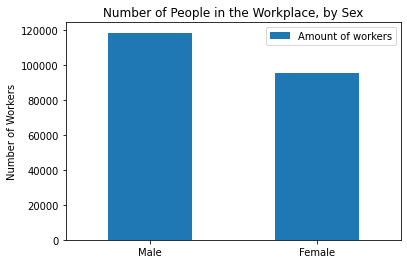

In [11]:
Male_workers = 0
Female_workers = 0

#iterate to count number of male and female workers
for i, j in data.iterrows():
    Male_workers += int(j['Male Workers'])
    Female_workers += int(j['Female Workers'])

# create new dataframe to visualize workplace by gender
worker_by_sex = pd.DataFrame({'Amount of workers': [Male_workers, Female_workers]}, index = ["Male", "Female"])
ax = worker_by_sex.plot.bar(rot=0)

# format bar chart
plt.ylabel("Number of Workers")
plt.title("Number of People in the Workplace, by Sex")
plt.show()

As we can see, there are substantially more male workers than female workers. This indicates that relative to men, women are more likely to be out of work.



> Now, we re-iterate through the data to add all of the male and female salaries and male salaries to variables, keeping track of the number of jobs for each so that we can calculate the average salaries for men and women.



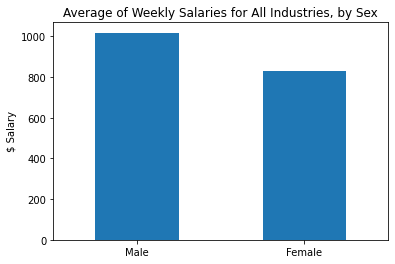

In [67]:
Male_worker_salary = 0
Female_worker_salary = 0
number_of_job_types = 0

# use loop to calculate sum of average male & female weekly salaries for all industries
for i, j in data.iterrows():
  if j['Average Male Weekly Salary'] != "Na" and j['Average Female Weekly Salary'] != "Na":
    Male_worker_salary += int(j['Average Male Weekly Salary'])
    Female_worker_salary += int(j['Average Female Weekly Salary'])
    number_of_job_types += 1

# divide each sum by number of job types to get the average weekly salary for all industries
Average_Median_M = Male_worker_salary/number_of_job_types
Average_Median_F = Female_worker_salary/number_of_job_types

worker_by_sex = pd.DataFrame({'Average Median Salary': [Average_Median_M, Average_Median_F]}, index = ["Male", "Female"])
ax = worker_by_sex.plot.bar(rot=0)
ax.get_legend().remove()
plt.ylabel("$ Salary")
plt.title("Average of Weekly Salaries for All Industries, by Sex")
plt.show()

Based on this bar chart, we can observe that after averaging the weekly salaries for men and women across all industries, the average weekly salary for a male is higher than that for a female. 
For men that salary is 1,018 dollars per week.
For women it is 828 dollars per week.
Broadly, men on average get paid more than women - and when predicting salaries for men and women, if we know nothing about an individual's line of work, it's reasonable to assume that they will earn more as a man than as a woman. 

In [71]:
perc = (Average_Median_M - Average_Median_F) / Average_Median_M
print(Average_Median_M)
print(Average_Median_F)
print(perc)

1018.4042553191489
828.1914893617021
0.18677530554685048


Male workers' average salary across all industries is 18.67% higher than that of females

In [15]:
data['gender ratio'] = data['Female Workers']/data['Total Workers']
data.head()

,Occupation,Total Workers,Average Weekly Salary,Male Workers,Average Male Weekly Salary,Female Workers,Average Female Weekly Salary,gender ratio
1,MANAGEMENT,12480,1351,7332,1486,5147,1139,0.412420
2,Chief executives,1046,2041,763,2251,283,1836,0.270554
3,General and operations managers,823,1260,621,1347,202,1002,0.245443
5,Advertising and promotions managers,55,1050,29,Na,26,Na,0.472727
6,Marketing and sales managers,948,1462,570,1603,378,1258,0.398734




> We add a column in the data frame that calculates the female ratio compared to all workers for every industry.



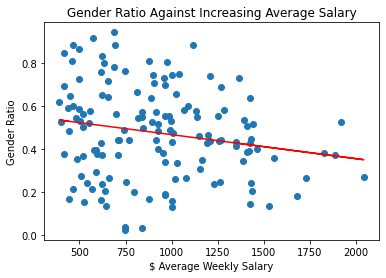

In [72]:
# filter out rows where salaries are 'Na', and cast all salaries to integers
data = data[data['Average Female Weekly Salary'] != "Na"]
data = data[data['Average Male Weekly Salary'] != "Na"]
data['Average Female Weekly Salary'] = data['Average Female Weekly Salary'].astype(int)
data['Average Male Weekly Salary'] = data['Average Male Weekly Salary'].astype(int)

# use the gender ratio column to create a linear regression that predicts gender ratio
# given an average weekly salary.

l = data['gender ratio']
y = np.reshape(list(data['Average Weekly Salary']),(-1,1))

model = LinearRegression()
model.fit(y,l)

# format the plot, adding data points and labels. 

plt.plot(y, model.predict(y), color='red')

plt.scatter(x=data['Average Weekly Salary'],y=data['gender ratio'])

plt.xlabel("$ Average Weekly Salary")

plt.ylabel("Gender Ratio")

plt.title("Gender Ratio Against Increasing Average Salary")

plt.show()





> We remove the data entries that have no record or female/male specific data entries


> We plotted the female in workplace ratio against the increase of salary, we see that there is a general trend that as salary increases, the ratio of females in that field earning that salary decreases.

 >We can also see that a few of highest paying careers, the female to overall workplace ratio is usually all under .4, meaning that for the highest paying fields, women's proportion is actually lower.

> We also fitted a linear regression using LinearRegression and fitted a line of best fit using the two variables.

> To look at the specific syntax ->https://www.w3schools.com/python/python_ml_linear_regression.asp


> We simply plotted the scatterplot using matplotlib









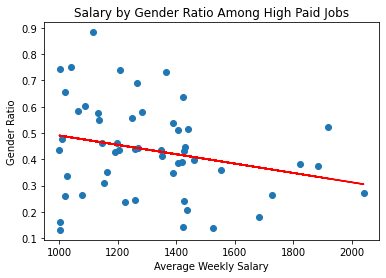

In [73]:
# filter rows in the data frame where average weekly salary is greater than $1000

data_high_paid = data[data['Average Weekly Salary'] > 1000]

# use the gender ratio column in our new data frame to create a linear regression
# that predicts gender ratio given an average weekly salary, where all average weekly
# salaries are greater than $1000.

l = data_high_paid['gender ratio']
y = np.reshape(list(data_high_paid['Average Weekly Salary']),(-1,1))


model = LinearRegression()
model.fit(y,l)

# format the plot, adding data points and labels. 

plt.plot(y, model.predict(y), color='red')

plt.scatter(x=data_high_paid['Average Weekly Salary'],y=data_high_paid['gender ratio'])

plt.xlabel("Average Weekly Salary")

plt.ylabel("Gender Ratio")

plt.title("Salary by Gender Ratio Among High Paid Jobs")

plt.show()



> We now repeat what we previously did, but narrowing our data points to draw from only the highest paying careers


> For the highest paying jobs, the gender ratio declines at a faster rate. In other words, the coefficient for our linear regression is more negative than in the last regression. We can conclude from this that the disadvantage women experience, in terms of employment, is more prominent in careers with higher average weekly salaries. 



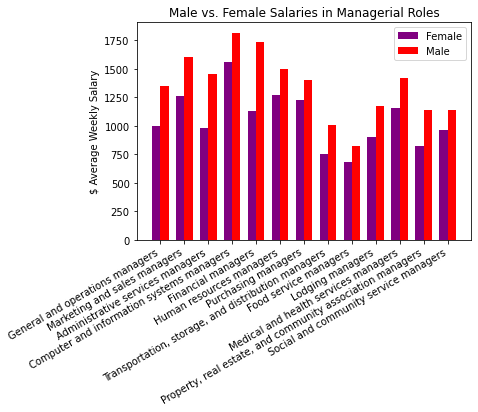

In [113]:
data_managers = data

# search for managerial roles within our broader dataset of all occupations.
for i, j in data_managers.iterrows():
  if "manager" not in j['Occupation'] :
    data_managers = data_managers.drop(i)
  
# reformat our new data frame to incorporate male and female managers, and
# their weekly salaries.
l = data_managers['Female Workers']
y = np.reshape(list(data_managers['Average Female Weekly Salary']),(-1,1))

l2 = data_managers['Male Workers']
y2 = np.reshape(list(data_managers['Average Male Weekly Salary']),(-1,1))

# format the plot, adding data points and labels. 

fig, ax = plt.subplots()
index = np.arange(13)
female = ax.bar(index, data_managers['Average Female Weekly Salary'], .35, color='purple')
male = ax.bar(index + .35, data_managers['Average Male Weekly Salary'], .35, color='red')

ax.set_xticks(index + .35/2)
ax.set_xticklabels(data_managers['Occupation'])
ax.set_ylabel('$ Average Weekly Salary')
ax.set_title('Male vs. Female Salaries in Managerial Roles')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(['Female', 'Male'])

plt.show()

> We go through the dataframe row by row, but only look at the data that represent management related jobs.

> We visualize the differences in Average Weekly Salary for Men and Women by 
industry, and see that there is a clear salary gap for all management related 
jobs in our dataset. 


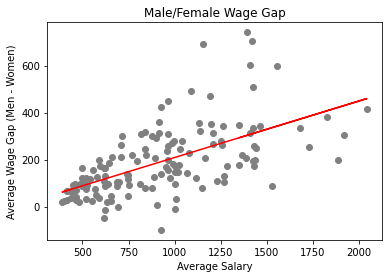

In [31]:
# create a 'wage difference' field by subtracting average female weekly salary from
# average male weekly salary. 

data['wage_difference'] = data['Average Male Weekly Salary'] - data['Average Female Weekly Salary']

l = data['wage_difference']
y = np.reshape(list(data['Average Weekly Salary']),(-1,1))

# create a linear regression to predict the gap between the average male weekly salary and
# average female weekly salary given the average weekly salary of an industry. 

model = LinearRegression()
model.fit(y,l)

# format the plot, adding data points and labels. 

plt.plot(y, model.predict(y), color='red')

plt.scatter(x=data['Average Weekly Salary'],y=data['wage_difference'], color = 'grey')

plt.xlabel("Average Salary")

plt.ylabel("Average Wage Gap (Men - Women)")

plt.title("Male/Female Wage Gap")

plt.show()



> Lastly, We create a new column called wage difference, that is the difference in wages for every industry between men and women.

> We graph the wage difference against the salary increase and created a line of best fit

> We see that as an industry pays more, the men in that specific fields get paid more compared to the corresponding female workers







Therefore, we can conclude workers' wages increase, the difference between men and women in that specific field also increases drastically

**Step 3 - hypothesis testing and machine learning**

It is clear from our data analysis that when the average salary of an industry increases, the ratio of the women workers for that industry decreases, and the wage gap between men and women increases

> we revisit the analyses we have done and refine the models

> We will use hyphothesis testing to see if the relationship we observed is significant

> If you want to learn more about Hypothesis testing ->https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/


> We use OLS to obtain the regression result for the model we get


> For OLS syntax -> https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html









In [53]:
from statsmodels.formula.api import ols
x = data['Average Weekly Salary']
y = data['gender ratio']

# use statsmodels to run Ordinary Least Squares
reg= ols('y~x', data=data).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.559
Date:                Thu, 09 Dec 2021   Prob (F-statistic):             0.0198
Time:                        19:40:05   Log-Likelihood:                 22.554
No. Observations:                 141   AIC:                            -41.11
Df Residuals:                     139   BIC:                            -35.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5793      0.047     12.295      0.000       0.486       0.672
x             -0.0001   4.75e-05     -2.358      0.020      -0.000   -1.81e-05
==============================================================================
Omnibus:                        3.163   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.091
Skew:                          -0.073   Prob(JB):                        0.352
Kurtosis:                       2.421   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the linear regression model we obtained from salary vs gender ratio we can see that as salary increases the female gender in workplace decreases by 0.01%

We try to find an another model to better fit our prediction so we are looking at gender gap instead since the p value is high being 0.02 considering if we use 1% level of significance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gap   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     76.15
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           7.31e-15
Time:                        19:46:35   Log-Likelihood:                -874.90
No. Observations:                 141   AIC:                             1754.
Df Residuals:                     139   BIC:                             1760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.6386     27.379     -1.156      0.250     -85.773      22.495
Ave_sal        0.2406      0.028      8.726      0.000       0.186       0.295
==============================================================================
Omnibus:                       31.912   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.024
Skew:                           1.027   Prob(JB):                     1.52e-13
Kurtosis:                       5.414   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

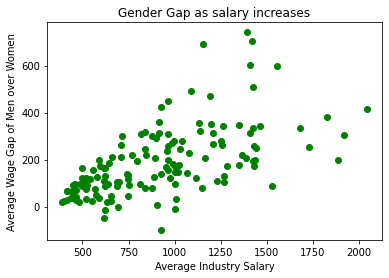

In [65]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# plot the wage difference using the field we created earlier
plt.scatter(x=data['Average Weekly Salary'],y=data['wage_difference'], color = 'green')

plt.xlabel("Average Industry Salary")

plt.ylabel("Average Wage Gap of Men over Women")

plt.title("Gender Gap as salary increases")

Ave_sal = data['Average Weekly Salary']
gap = data['wage_difference']

# create a linear regression to predict the rate of increase of the wage gap
# based on increasing average weekly salary.

l = data['wage_difference']
y = np.reshape(list(data['Average Weekly Salary']),(-1,1))
model = LinearRegression()
model.fit(y,l)

# again, we use statsmodels to run an Ordinary Least Squares
regression = ols('gap~Ave_sal', data=data).fit()

regression.summary()



Tenatively, we can tell that as Average Industry Salary increases by 1 dollar, the wage gap between Men and Women increases by 24 cents.

In [63]:
model.coef_

array([0.24064747])

We see now the p-value dropped to 0, and this model better represents how the salary in an industry changes the wage gap between men and women

Our hypothesis is that as salary increases, the gender gap increases.


> H0 : b = 0 (that Average salary is not a signifiant indicator for explaining the wage difference)


> H1 : b != 0 (that Average salary is a signifiant indicator for explaining the wage difference)


> p < 0.01 as we can see the chart. we reject H0, so we conclude that salary is a significant predictor at explaining the variation of gender gap.

> At the end, we get the conclusion from the model that as salary increases by one dollar, the wage gap increases by 0.24064747 dollar











**Summary**

In this tutorial, we took a streamlined approach to draw conclusions about wage differences between genders from a CSV dataset, using a variety of techniques to summarize, visualize, and extrapolate predictions from data. Specifically, we began by curating and parsing our data. To do so, we used pandas to create a data frame from the intial Kaggle CSV file of average weekly salaries for men and women in different fields. After creating this data frame, we cleansed the data by removing items without relevant information (such as missing salary).

After this, we were able to use our data frame to create several plots with the matplotlib extension. We created visualizations of many data comparisons, including the number of employed men vs. women, the average weekly salaries among all industries, gender ratio across all jobs and within the highest paid fields, wage differences within managerial roles, and the broad wage gap between genders. This also led to insights such as the percentage difference for average weekly salary between men and women (18.67%) and a linear regression for the growing wage gap as salary increases. 

Lastly, we ran hypothesis testing to clarify the results of our exploratory data analysis. When doing this, we were able to observe changes in p-values and verify accuracy for our models. For example, we were able to conlcude - with a one percent level of significance - that as a job's average weekly salary increases by one dollar, the wage gap between the expected salary of a man and a woman increases by 24 cents. 

By following these steps; curating and parsing data, performing exploratory data analysis, and running hypothesis testing, we made meaningful findings. We  determined that the wage gap between average weekly salaries for men and women is present and pervasive, especially in higher paid fields. Across all of the industries in our dataset, the average weekly salary for men is 1,018 dollars, and for women it is 828 dollars. This amounts to a difference of over 18 percent, and implies that when predicting weekly salary for any given man or woman (without any information about that person's occupation), we can only assume that a woman working the same role as a man will make 18% less in any of these industries. Surely, there are confounding variables when we consider outliers for some industries and some high paid roles, but these do not detract from the significant difference when we observe averages, and hardly counteract what is a wide gender wage gap. 

Furthermore, we discovered that within managerial roles, the gender wage gap is consistent with what we found from the broader average among all industries. The wage gap in average weekly salary is consistently 15-20% for every role containing 'manager' in its title, and there are no managerial roles where the average weekly salary for women is higher than that for men. We found that there is a distinctive relationship between average weekly salary and gender ratio; as average weekly salary for a given role increases, the gender ratio decreases from about 50:50 to under 60:40, and the rate of decrease is more steep when confining the data to roles with a minimum average weekly salary of 1000 dollars. Additionally, this relationship exists between average weekly salary and wage gap: as weekly salary increases, the difference between salary for men and women also increases. In addition to what implications we already mentioned, our data-based findings warn of gender wage differences that are deeply ingrained in a large majority of the industries that were surveyed in this Kaggle dataset.  


In this tutorial, we learned how to:

*   Create and manipulate dataframes using Pandas
*   Add, modify, and remove columns and rows in dataframes
*   Filter data to focus on different subsets
*   Iterate through dataframes to create plots with matplotlib
*   Create and format different types of plots
*   Build a linear regression model
*   Interpret predicitons from linear regression
*   Use Ordinary Least Squares to measure accuracy of models and fit predictions